# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [4]:
df_tesla.shape
df_btc_search.shape
df_btc_price.shape
df_unemployment.shape

df_tesla.columns
df_btc_search.columns
df_btc_price.columns
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [5]:
print(f'Largest value for Tesla in Web Search: ', df_tesla['TSLA_WEB_SEARCH'].max())
print(f'Smallest value for Tesla in Web Search: ', df_tesla['TSLA_WEB_SEARCH'].min())

Largest value for Tesla in Web Search:  31
Smallest value for Tesla in Web Search:  2


In [6]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [7]:
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [8]:
# print('Largest value for "Unemployemnt Benefits" '
#       f'in Web Search: ', df_unemployment['UE_BENEFITS_WEB_SEARCH'].max())

print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: ', df_unemployment.UE_BENEFITS_WEB_SEARCH.max())

Largest value for "Unemployemnt Benefits" in Web Search:  100


### Bitcoin

In [9]:
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [10]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [11]:
print(f'largest BTC News Search: ', df_btc_search.BTC_NEWS_SEARCH.max())

largest BTC News Search:  100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [12]:
# print(f'Missing values for Tesla?: ', df_tesla.fillna(0, inplace=True))
print(f'Missing values for Tesla?: ', df_tesla.isna().values.any())
print(f'Missing values for U/E?: ', df_unemployment.isna().values.any())
print(f'Missing values for BTC Search?: ', df_btc_search.isna().values.any())

Missing values for Tesla?:  False
Missing values for U/E?:  False
Missing values for BTC Search?:  False


In [13]:
print(f'Missing values for BTC price?: ', df_btc_price.isna().values.any())

Missing values for BTC price?:  True


In [14]:
print(f'Number of missing values: ', df_btc_price.isna().values.sum())
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values:  2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [15]:
df_btc_price.fillna(0, inplace=True)
# df_btc_price = df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [16]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)



In [17]:
type(df_tesla.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [18]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [19]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [20]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [21]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

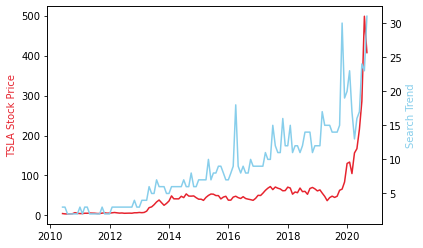

In [22]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue') # or a named colour

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue')

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

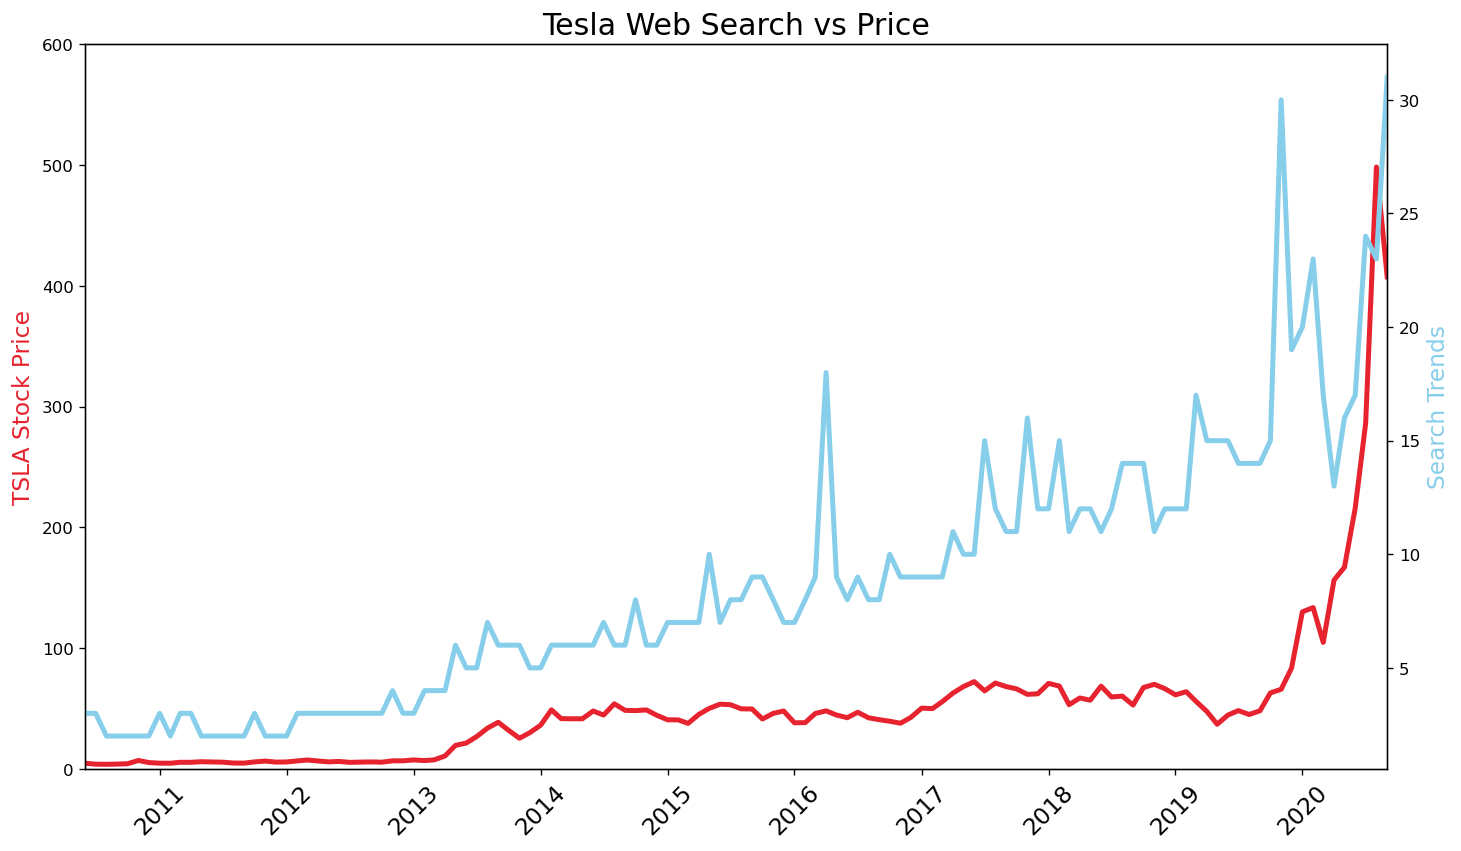

In [23]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trends', color='skyblue', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

How to add tick formatting for dates on the x-axis. 

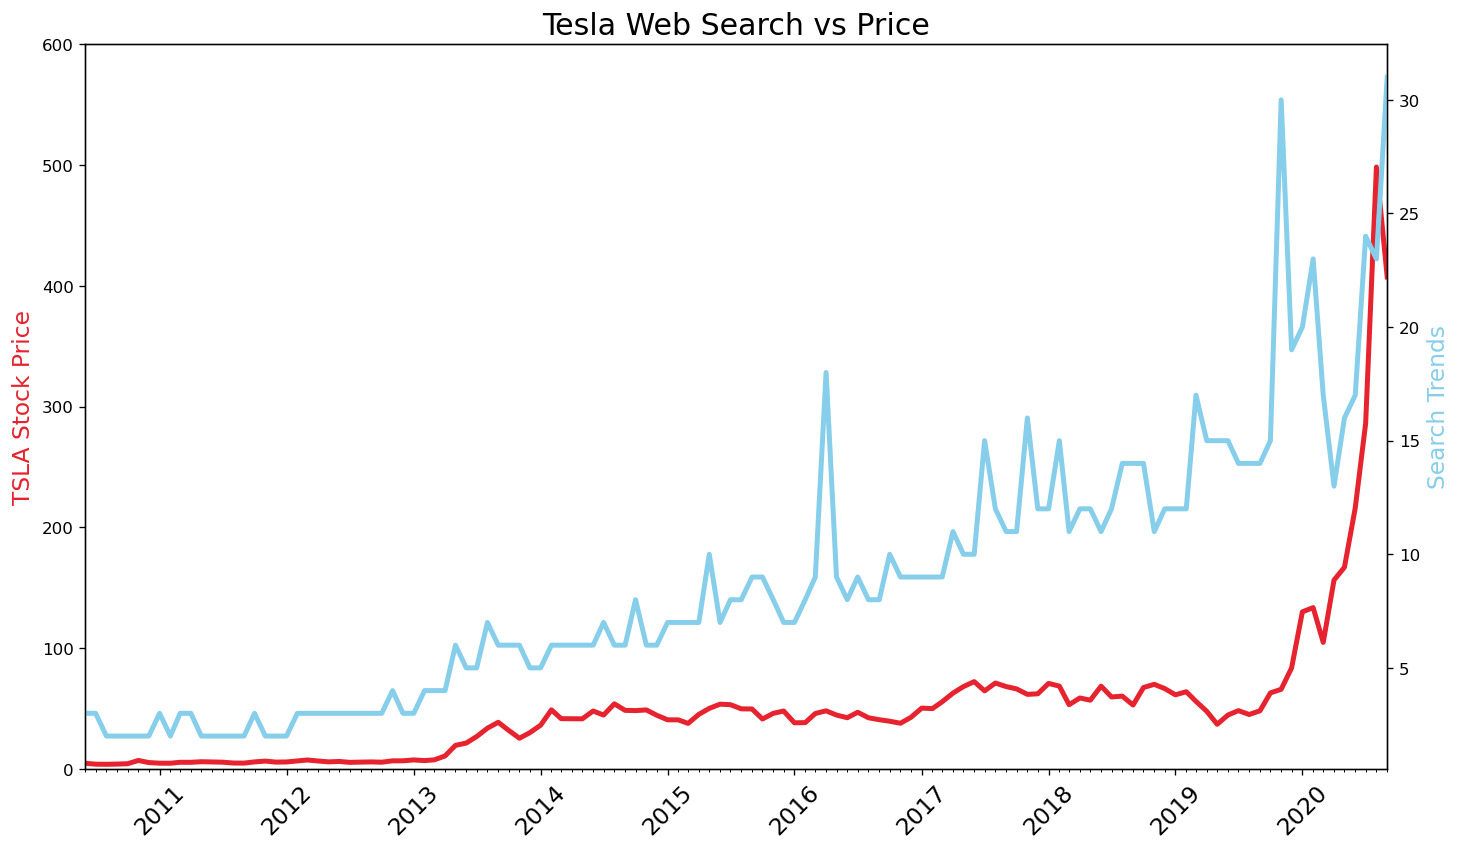

In [24]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trends', color='skyblue', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [27]:
print(df_btc_monthly.head())
print(df_btc_search.head())

                 DATE       CLOSE      VOLUME
DATE                                         
2014-09-30 2014-09-30  386.944000  34707300.0
2014-10-31 2014-10-31  338.321014  12545400.0
2014-11-30 2014-11-30  378.046997   9194440.0
2014-12-31 2014-12-31  320.192993  13942900.0
2015-01-31 2015-01-31  217.464005  23348200.0
       MONTH  BTC_NEWS_SEARCH
0 2014-09-01                5
1 2014-10-01                4
2 2014-11-01                4
3 2014-12-01                4
4 2015-01-01                5


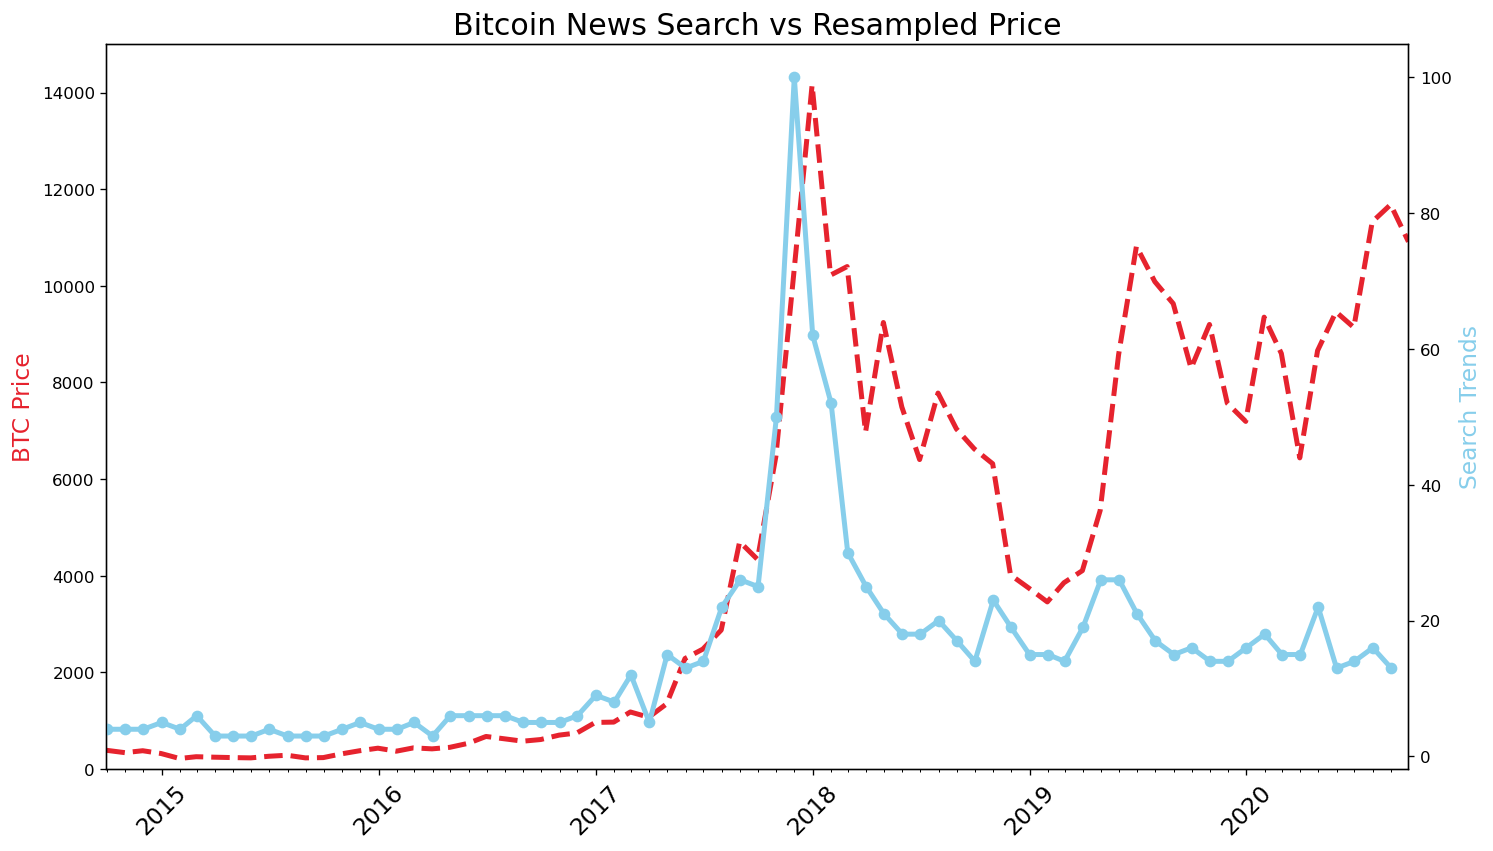

In [39]:
plt.figure(figsize=(14, 8), dpi=120)

plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('BTC Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trends', color='skyblue', fontsize=14)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='#E6232E', linewidth=3, linestyle='--')
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

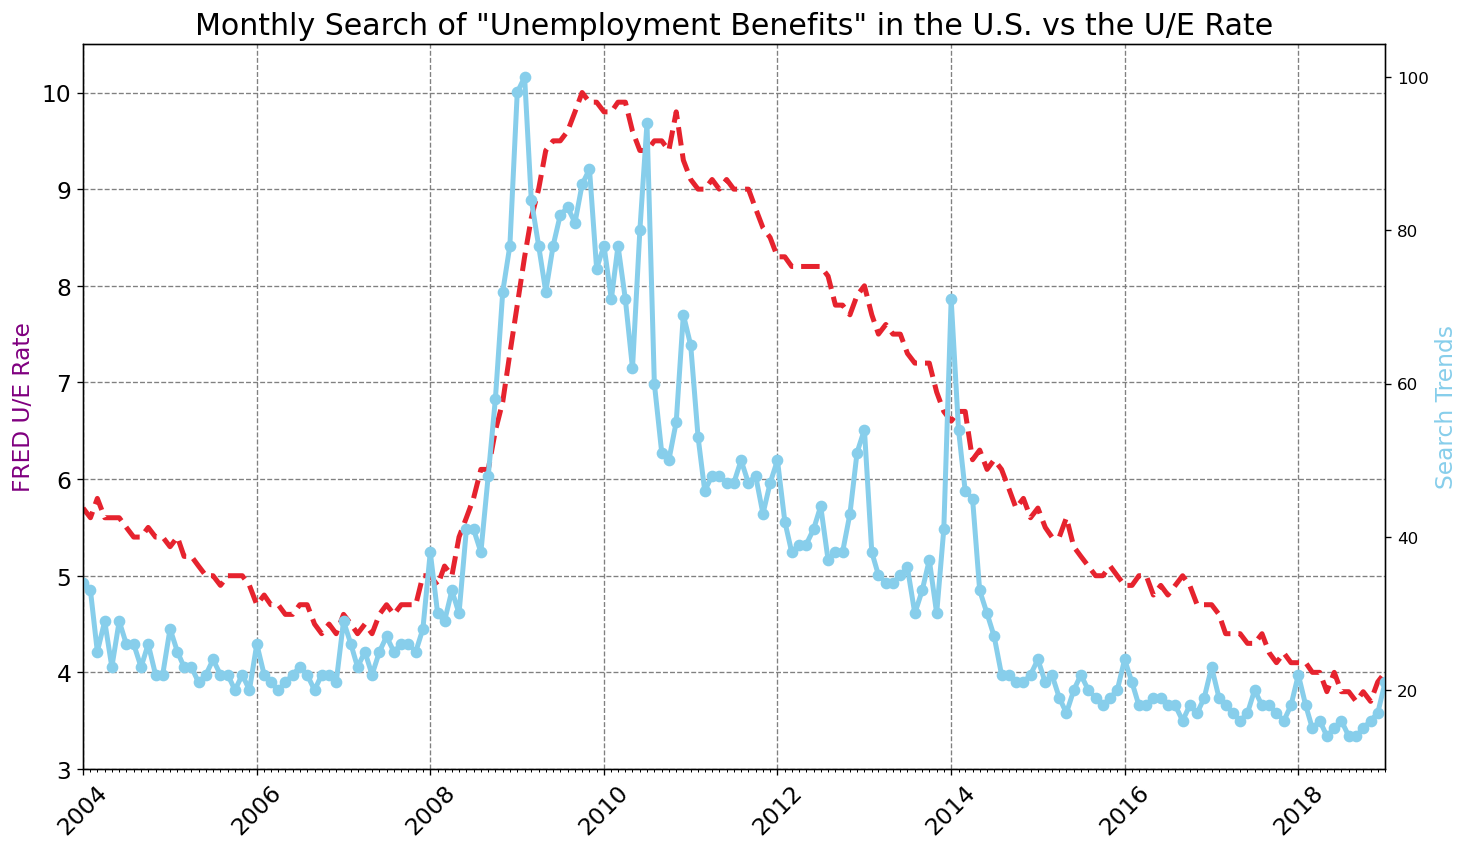

In [51]:
plt.figure(figsize=(14, 8), dpi=120)
# plt.grid(color='grey')

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trends', color='skyblue', fontsize=14)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='#E6232E', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3, marker='o')

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


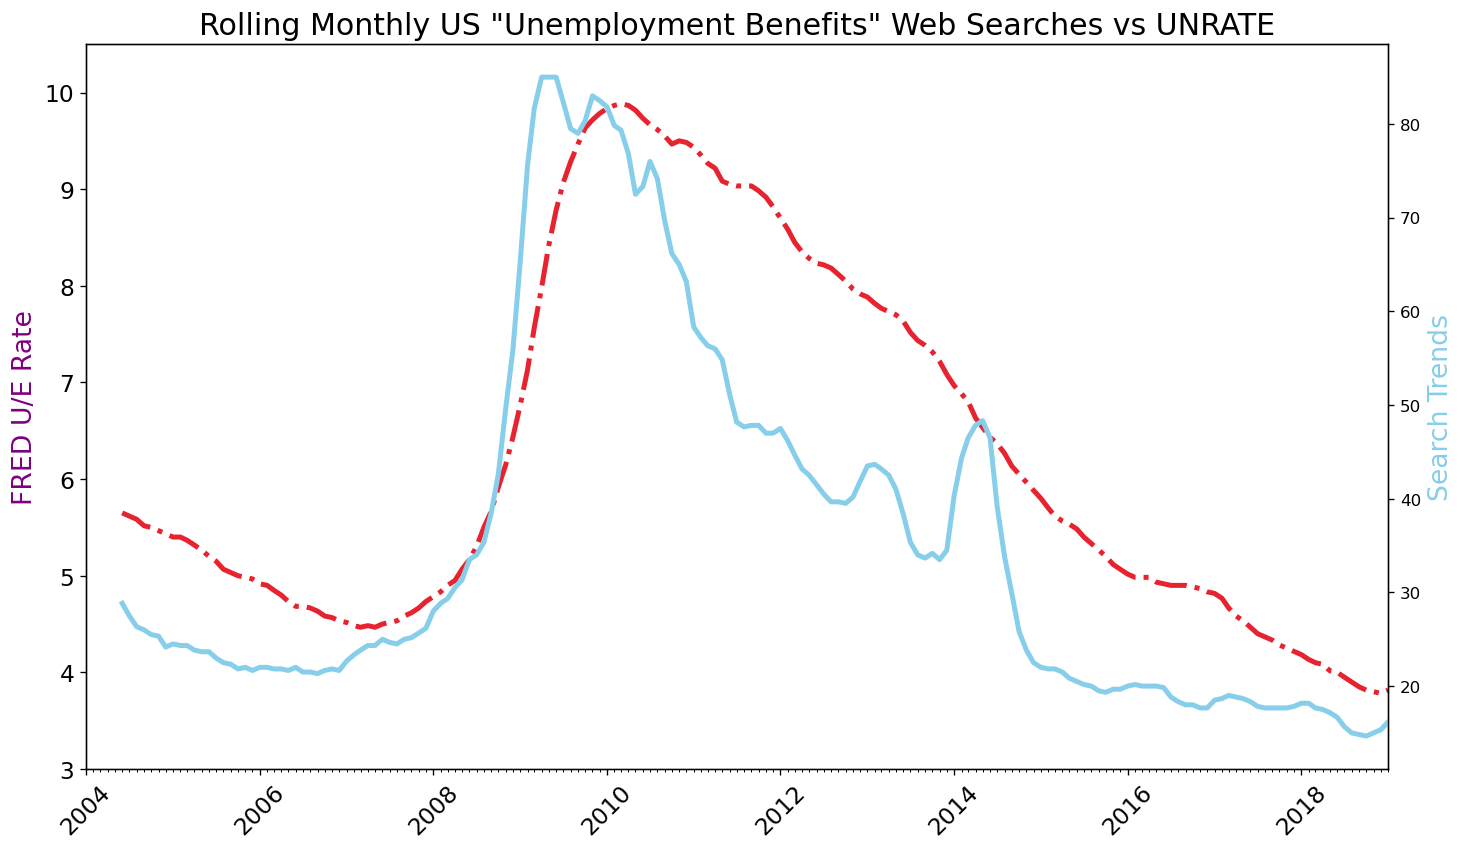

In [64]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trends', color='skyblue', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()


ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color='#E6232E', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()



### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [65]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [66]:
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

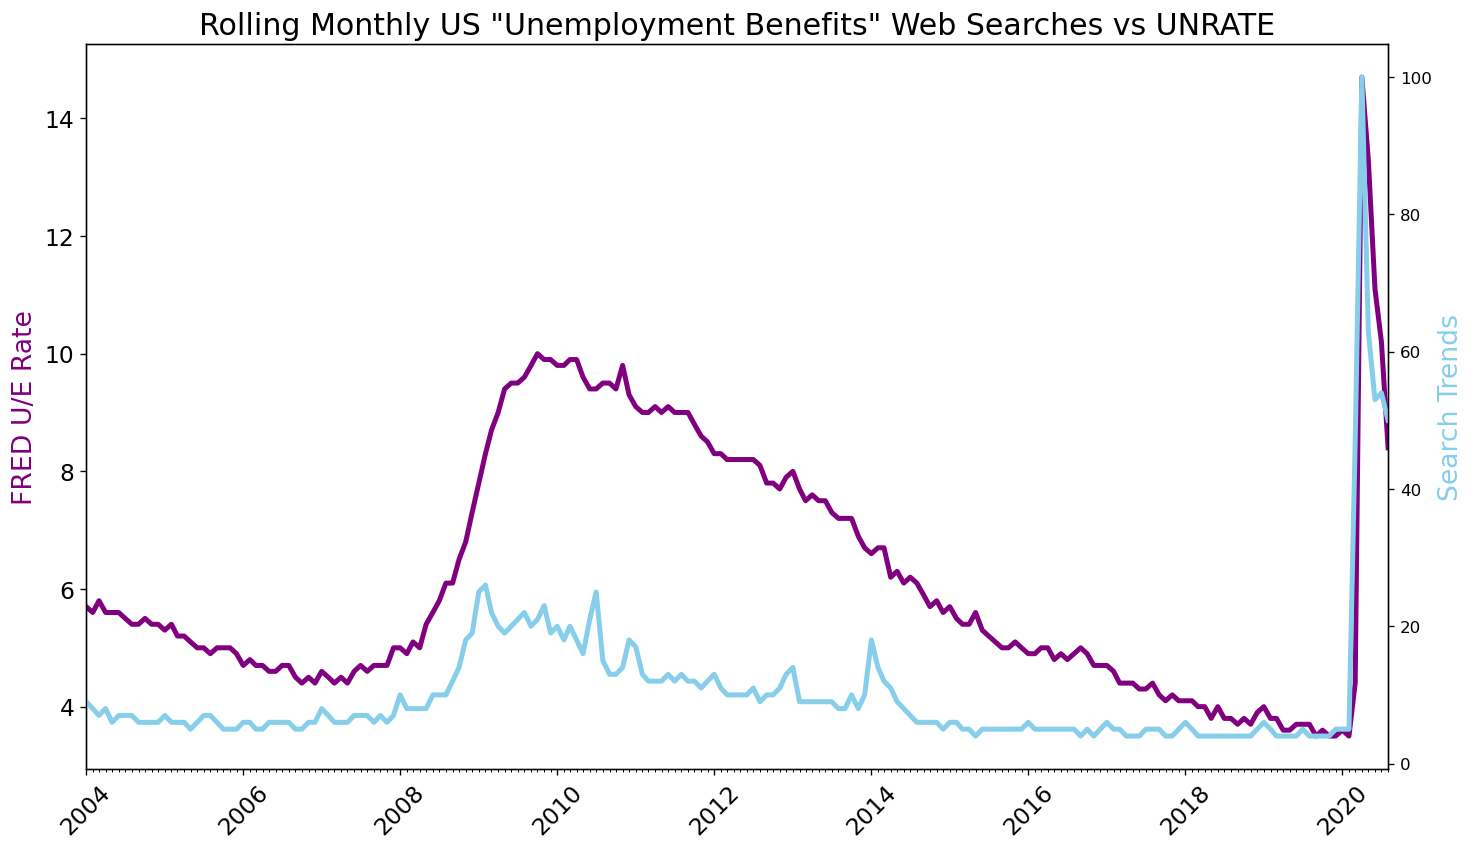

In [68]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trends', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])



ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, color='purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()



In [71]:
import sha3

STOP = 0x00
ADD = 0x01
MUL = 0x02
SUB = 0x03
DIV = 0x04
SDIV = 0x05
MOD = 0x06
SMOD = 0x07
ADDMOD = 0x08
MULMOD = 0x09
EXP = 0x0A
SIGNEXTEND = 0x0B
LT = 0x10
GT = 0x11
SLT = 0x12
SGT = 0x13
EQ = 0x14
ISZERO = 0x15
AND = 0x16
OR = 0x17
XOR = 0x18
NOT = 0x19
BYTE = 0x1A
SHL = 0x1B
SHR = 0x1C
SAR = 0x1D
SHA3 = 0x20
ADDRESS = 0x30
BALANCE = 0x31
ORIGIN = 0x32
CALLER = 0x33
CALLVALUE = 0x34
CALLDATALOAD = 0x35
CALLDATASIZE = 0x36
CALLDATACOPY = 0x37
CODESIZE = 0x38
CODECOPY = 0x39
GASPRICE = 0x3A
EXTCODESIZE = 0x3B
EXTCODECOPY = 0x3C
EXTCODEHASH = 0x3F
BLOCKHASH = 0x40
COINBASE = 0x41
TIMESTAMP = 0x42
NUMBER = 0x43
PREVRANDAO = 0x44
GASLIMIT = 0x45
CHAINID = 0x46
SELFBALANCE = 0x47
BASEFEE = 0x48
PUSH0 = 0x5F
PUSH1 = 0x60
PUSH32 = 0x7F
DUP1 = 0x80
DUP16 = 0x8F
SWAP1 = 0x90
SWAP16 = 0x9F
POP = 0x50
MLOAD = 0x51
MSTORE = 0x52
MSTORE8 = 0x53
SLOAD = 0x54
SSTORE = 0x55
JUMP = 0x56
JUMPI = 0x57
PC = 0x58
MSIZE = 0x59
JUMPDEST = 0x5B
LOG0 = 0xA0
LOG1 = 0xA1
LOG2 = 0xA2
LOG3 = 0xA3
LOG4 = 0xA4

account_db = {
    '0x9bbfed6889322e016e0a02ee459d306fc19545d8': {
        'balance': 100, # wei
        'nonce': 1, 
        'storage': {},
        'code': b'\x60\x00\x60\x00'  # Sample bytecode (PUSH1 0x00 PUSH1 0x00)
    },
    # ... 其他账户数据 ...
}

class Transaction:
    def __init__(self, to = '', value = 0, data = '', caller='0x00', origin='0x00', thisAddr='0x00', gasPrice=1, gasLimit=21000, nonce=0, v=0, r=0, s=0):
        self.nonce = nonce
        self.gasPrice = gasPrice
        self.gasLimit = gasLimit
        self.to = to
        self.value = value
        self.data = data
        self.caller = caller
        self.origin = origin
        self.thisAddr = thisAddr
        self.v = v
        self.r = r
        self.s = s

class StopException(Exception):
    pass

class Log:
    def __init__(self, address, data, topics=[]):
        self.address = address
        self.data = data
        self.topics = topics

    def __str__(self):
        return f'Log(address={self.address}, data={self.data}, topics={self.topics})'

class EVM:
    def __init__(self, code, txn = None):
        self.code = code # 初始化字节码，bytes对象
        self.pc = 0  # 初始化程序计数器为0
        self.stack = [] # 堆栈初始为空
        self.memory = bytearray()  # 内存初始化为空
        self.storage = {}  # 存储初始化为空字典
        self.txn = txn
        self.logs = []
        self.current_block = {
            "blockhash": 0x7527123fc877fe753b3122dc592671b4902ebf2b325dd2c7224a43c0cbeee3ca,
            "coinbase": 0x388C818CA8B9251b393131C08a736A67ccB19297,
            "timestamp": 1625900000,
            "number": 17871709,
            "prevrandao": 0xce124dee50136f3f93f19667fb4198c6b94eecbacfa300469e5280012757be94,
            "gaslimit": 30,
            "chainid": 1,
            "selfbalance": 100,
            "basefee": 30,
        }

    def next_instruction(self):
        op = self.code[self.pc]  # 获取当前指令
        self.pc += 1  # 递增
        return op

    def push(self, size):
        data = self.code[self.pc:self.pc + size] # 按照size从code中获取数据
        value = int.from_bytes(data, 'big') # 将bytes转换为int
        self.stack.append(value) # 压入堆栈
        self.pc += size # pc增加size单位

    def pop(self):
        if len(self.stack) == 0:
            raise Exception('Stack underflow')
        return self.stack.pop() # 弹出堆栈

    def add(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        res = (a + b) % (2**256) # 加法结果需要模2^256，防止溢出
        self.stack.append(res)
        
    def mul(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        res = (a * b) % (2**256) # 乘法结果需要模2^256，防止溢出
        self.stack.append(res)

    def sub(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        res = (a - b) % (2**256) # 结果需要模2^256，防止溢出
        self.stack.append(res)

    def div(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        if a == 0:
            res = 0
        else:
            res =  (a // b) % (2**256)
        self.stack.append(res)

    def sdiv(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        res = a//b % (2**256) if a!=0 else 0
        self.stack.append(res)

    def mod(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        res = a % b if a != 0 else 0
        self.stack.append(res)

    def smod(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        res = a % b if a != 0 else 0
        self.stack.append(res)

    def addmod(self):
        if len(self.stack) < 3:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        n = self.stack.pop()
        res = (a + b) % n if n != 0 else 0
        self.stack.append(res)

    def mulmod(self):
        if len(self.stack) < 3:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        n = self.stack.pop()
        res = (a * b) % n if n != 0 else 0
        self.stack.append(res)

    def exp(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        res = pow(a, b) % (2**256)
        self.stack.append(res)
        
    def signextend(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        b = self.stack.pop()
        x = self.stack.pop()
        if b < 32: # 如果b>=32，则不需要扩展
            sign_bit = 1 << (8 * b - 1) # b 字节的最高位（符号位）对应的掩码值，将用来检测 x 的符号位是否为1
            x = x & ((1 << (8 * b)) - 1)  # 对 x 进行掩码操作，保留 x 的前 b+1 字节的值，其余字节全部置0
            if x & sign_bit:  # 检查 x 的符号位是否为1
                x = x | ~((1 << (8 * b)) - 1)  # 将 x 的剩余部分全部置1
        self.stack.append(x)
        
    def lt(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append(int(b < a)) # 注意这里的比较顺序

    def gt(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append(int(b > a)) # 注意这里的比较顺序

    def slt(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append(int(b < a)) # 极简evm stack中的值已经是以有符号整数存储了，所以和lt一样实现

    def sgt(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append(int(b > a)) # 极简evm stack中的值已经是以有符号整数存储了，所以和gt一样实现

    def eq(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append(int(a == b))

    def iszero(self):
        if len(self.stack) < 1:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        self.stack.append(int(a == 0))

    def and_op(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append(a & b)

    def or_op(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append(a | b)

    def xor_op(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append(a ^ b)

    def not_op(self):
        if len(self.stack) < 1:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        self.stack.append(~a % (2**256)) # 按位非操作的结果需要模2^256，防止溢出

    def byte_op(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        position = self.stack.pop()
        value = self.stack.pop()
        if position >= 32:
            res = 0
        else:
            res = (value // pow(256, 31 - position)) & 0xFF
        self.stack.append(res)

    def shl(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append((b << a) % (2**256)) # 左移位操作的结果需要模2^256
    
    def shr(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append(b >> a) # 右移位操作
        
    def sar(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        a = self.stack.pop()
        b = self.stack.pop()
        self.stack.append(b >> a) # 右移位操作

    def mstore(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        offset = self.stack.pop()
        value = self.stack.pop()
        while len(self.memory) < offset + 32:
            self.memory.append(0) # 内存扩展
        self.memory[offset:offset+32] = value.to_bytes(32, 'big')

    def mstore8(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        offset = self.stack.pop()
        value = self.stack.pop()
        while len(self.memory) < offset + 32:
            self.memory.append(0) # 内存扩展
        self.memory[offset] = value & 0xFF # 取最低有效字节

    def mload(self):
        if len(self.stack) < 1:
            raise Exception('Stack underflow')
        offset = self.stack.pop()
        while len(self.memory) < offset + 32:
            self.memory.append(0) # 内存扩展
        value = int.from_bytes(self.memory[offset:offset+32], 'big')
        self.stack.append(value)

    def sload(self):
        if len(self.stack) < 1:
            raise Exception('Stack underflow')
        key = self.stack.pop()
        value = self.storage.get(key, 0) # 如果键不存在，返回0
        self.stack.append(value)

    def sstore(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        key = self.stack.pop()
        value = self.stack.pop()
        self.storage[key] = value

    def jump(self):
        if len(self.stack) < 1:
            raise Exception('Stack underflow')
        destination = self.stack.pop()
        if self.code[destination] != JUMPDEST:
            raise Exception('Invalid jump destination')
        self.pc = destination

    def jumpi(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')
        destination = self.stack.pop()
        condition = self.stack.pop()
        if condition != 0:
            if self.code[destination] != JUMPDEST:
                raise Exception('Invalid jump destination')
            self.pc = destination

    def pc(self):
        self.stack.append(self.pc)

    def msize(self):
        self.stack.append(len(self.memory))

    def jumpdest(self):
        pass

    def blockhash(self):
        if len(self.stack) < 1:
            raise Exception('Stack underflow')
        number = self.stack.pop()
        # 在真实场景中, 你会需要访问历史的区块hash
        if number == self.current_block["number"]:
            self.stack.append(self.current_block["blockhash"])
        else:
            self.stack.append(0)  # 如果不是当前块，返回0

    def coinbase(self):
        self.stack.append(self.current_block["coinbase"])

    def timestamp(self):
        self.stack.append(self.current_block["timestamp"])

    def number(self):
        self.stack.append(self.current_block["number"])
        
    def prevrandao(self):
        self.stack.append(self.current_block["prevrandao"])
        
    def gaslimit(self):
        self.stack.append(self.current_block["gaslimit"])

    def chainid(self):
        self.stack.append(self.current_block["chainid"])

    def selfbalance(self):
        self.stack.append(self.current_block["selfbalance"])

    def basefee(self):
        self.stack.append(self.current_block["basefee"])

    def dup(self, position):
        if len(self.stack) < position:
            raise Exception('Stack underflow')
        value = self.stack[-position]
        self.stack.append(value)

    def swap(self, position):
        if len(self.stack) < position + 1:
            raise Exception('Stack underflow')
        idx1, idx2 = -1, -position - 1
        self.stack[idx1], self.stack[idx2] = self.stack[idx2], self.stack[idx1]
        
    def sha3(self):
        if len(self.stack) < 2:
            raise Exception('Stack underflow')

        offset = self.pop()
        size = self.pop()
        data = self.memory[offset:offset+size]  # 从内存中获取数据
        hash_value = int.from_bytes(sha3.keccak_256(data).digest(), 'big')  # 计算哈希值
        self.stack.append(hash_value)  # 将哈希值压入堆栈

    def balance(self):
        if len(self.stack) < 1:
            raise Exception('Stack underflow')
        addr_int = self.stack.pop()
        # 将stack中的int转换为bytes，然后再转换为十六进制字符串
        addr_str = '0x' + addr_int.to_bytes(20, byteorder='big').hex()
        self.stack.append(account_db.get(addr_str, {}).get('balance', 0))

    def extcodesize(self):
        if len(self.stack) < 1:
            raise Exception('Stack underflow')
        addr_int = self.stack.pop()
        # 将stack中的int转换为bytes，然后再转换为十六进制字符串，用于在账户数据库中查询
        addr_str = '0x' + addr_int.to_bytes(20, byteorder='big').hex()
        self.stack.append(len(account_db.get(addr_str, {}).get('code', b'')))

    def extcodecopy(self):
        # 确保堆栈中有足够的数据
        if len(self.stack) < 4:
            raise Exception('Stack underflow')
        addr_int = self.stack.pop()
        mem_offset = self.stack.pop()
        code_offset = self.stack.pop()
        length = self.stack.pop()
        # 将stack中的int转换为bytes，然后再转换为十六进制字符串，用于在账户数据库中查询
        addr_str = '0x' + addr_int.to_bytes(20, byteorder='big').hex()
        code = account_db.get(addr_str, {}).get('code', b'')[code_offset:code_offset+length]
        while len(self.memory) < mem_offset + length:
            self.memory.append(0)

        self.memory[mem_offset:mem_offset+length] = code

    def extcodehash(self):
        if len(self.stack) < 1:
            raise Exception('Stack underflow')
        addr_int = self.stack.pop()
        # 将stack中的int转换为bytes，然后再转换为十六进制字符串，用于在账户数据库中查询
        addr_str = '0x' + addr_int.to_bytes(20, byteorder='big').hex()
        code = account_db.get(addr_str, {}).get('code', b'')        
        code_hash = int.from_bytes(sha3.keccak_256(code).digest(), 'big')  # 计算哈希值
        self.stack.append(code_hash)

    def address(self):
        self.stack.append(self.txn.thisAddr)

    def origin(self):
        self.stack.append(self.txn.origin)

    def caller(self):
        self.stack.append(self.txn.caller)

    def callvalue(self):
        self.stack.append(self.txn.value)

    def calldataload(self):
        if len(self.stack) < 1:
            raise Exception('Stack underflow')
        offset = self.stack.pop()
        # 从字符形式转换为bytes数组
        calldata_bytes = bytes.fromhex(self.txn.data[2:])  # 假设由 '0x' 开头
        data = bytearray(32)
        # 复制calldata
        for i in range(32):
            if offset + i < len(calldata_bytes):
                data[i] = calldata_bytes[offset + i]
        self.stack.append(int.from_bytes(data, 'big'))

    def calldatasize(self):
        # Assuming calldata is a hex string with a '0x' prefix
        size = (len(self.txn.data) - 2) // 2
        self.stack.append(size)

    def calldatacopy(self):
        # 确保堆栈中有足够的数据
        if len(self.stack) < 3:
            raise Exception('Stack underflow')
        mem_offset = self.stack.pop()
        calldata_offset = self.stack.pop()
        length = self.stack.pop()

        # 拓展内存
        if len(self.memory) < mem_offset + length:
            self.memory.extend([0] * (mem_offset + length - len(self.memory)))

        # 从字符形式转换为bytes数组.
        calldata_bytes = bytes.fromhex(self.txn.data[2:])  # Assuming it's prefixed with '0x'

        # 将calldata复制到内存
        for i in range(length):
            if calldata_offset + i < len(calldata_bytes):
                self.memory[mem_offset + i] = calldata_bytes[calldata_offset + i]

    def codesize(self):
        addr = self.txn.thisAddr
        self.stack.append(len(account_db.get(addr, {}).get('code', b'')))

    def codecopy(self):
        if len(self.stack) < 3:
            raise Exception('Stack underflow')

        mem_offset = self.stack.pop()
        code_offset = self.stack.pop()
        length = self.stack.pop()

        # 获取当前地址的code
        addr = self.txn.thisAddr
        code = account_db.get(addr, {}).get('code', b'')

        # 拓展内存
        if len(self.memory) < mem_offset + length:
            self.memory.extend([0] * (mem_offset + length - len(self.memory)))

        # 将代码复制到内存
        for i in range(length):
            if code_offset + i < len(code):
                self.memory[mem_offset + i] = code[code_offset + i]
            
    def gasprice(self):
        self.stack.append(self.txn.gasPrice)

    def log(self, num_topics):
        if len(self.stack) < 2 + num_topics:
            raise Exception('Stack underflow')

        mem_offset = self.stack.pop()
        length = self.stack.pop()
        topics = [self.stack.pop() for _ in range(num_topics)]

        data = self.memory[mem_offset:mem_offset + length]
        log_entry = {
            "address": self.txn.thisAddr,
            "data": data.hex(),
            "topics": [f"0x{topic:064x}" for topic in topics]
        }
        self.logs.append(log_entry)

    def run(self):
        while self.pc < len(self.code):
            op = self.next_instruction()

            if PUSH1 <= op <= PUSH32: # 如果为PUSH1-PUSH32
                size = op - PUSH1 + 1
                self.push(size)
            elif op == PUSH0: # 如果为PUSH0
                self.stack.append(0)
            elif DUP1 <= op <= DUP16: # 如果是DUP1-DUP16
                position = op - DUP1 + 1
                self.dup(position)
            elif SWAP1 <= op <= SWAP16: # 如果是SWAP1-SWAP16
                position = op - SWAP1 + 1
                self.swap(position)
            elif op == POP: # 如果为POP
                self.pop()
            elif op == ADD: # 处理ADD指令
                self.add()
            elif op == MUL: # 处理MUL指令
                self.mul()
            elif op == SUB: # 处理SUB指令
                self.sub()
            elif op == DIV: # 处理DIV指令
                self.div()
            elif op == SDIV:
                self.sdiv()
            elif op == MOD:
                self.mod()
            elif op == SMOD:
                self.smod()
            elif op == ADDMOD:
                self.addmod()
            elif op == MULMOD:
                self.mulmod()
            elif op == EXP:
                self.exp()
            elif op == SIGNEXTEND:
                self.signextend()
            elif op == LT:
                self.lt()
            elif op == GT:
                self.gt()
            elif op == SLT:
                self.slt()
            elif op == SGT:
                self.sgt()
            elif op == EQ:
                self.eq()
            elif op == ISZERO:
                self.iszero()
            elif op == AND:  # 处理AND指令
                self.and_op()
            elif op == OR:  # 处理AND指令
                self.or_op()
            elif op == XOR:  # 处理AND指令
                self.xor_op()
            elif op == NOT:  # 处理AND指令
                self.not_op()
            elif op == BYTE:  # 处理AND指令
                self.byte_op()
            elif op == SHL:  # 处理AND指令
                self.shl()
            elif op == SHR:  # 处理AND指令
                self.shr()
            elif op == SAR:  # 处理AND指令
                self.sar()
            elif op == MLOAD: # 处理MLOAD指令
                self.mload()
            elif op == MSTORE: # 处理MSTORE指令
                self.mstore()
            elif op == MSTORE8: # 处理MSTORE8指令
                self.mstore8()
            elif op == SLOAD: 
                self.sload()
            elif op == SSTORE: # 处理SSTORE指令
                self.sstore()
            elif op == MSIZE: # 处理MSIZE指令
                self.msize()
            elif op == JUMP: 
                self.jump()
            elif op == JUMPDEST: 
                self.jumpdest()
            elif op == JUMPI: 
                self.jumpi()
            elif op == STOP: # 处理STOP指令
                print('Program has been stopped')
                break
            elif op == PC:
                self.pc()
            elif op == BLOCKHASH:
                self.blockhash()
            elif op == COINBASE:
                self.coinbase()
            elif op == TIMESTAMP:
                self.timestamp()
            elif op == NUMBER:
                self.number()
            elif op == PREVRANDAO:
                self.prevrandao()
            elif op == GASLIMIT:
                self.gaslimit()
            elif op == CHAINID:
                self.chainid()
            elif op == SELFBALANCE:
                self.selfbalance()
            elif op == BASEFEE:
                self.basefee()        
            elif op == SHA3: # 如果为SHA3
                self.sha3()
            elif op == BALANCE: 
                self.balance()
            elif op == EXTCODESIZE: 
                self.extcodesize()
            elif op == EXTCODECOPY: 
                self.extcodecopy()
            elif op == EXTCODEHASH: 
                self.extcodehash()
            elif op == ADDRESS: 
                self.address()
            elif op == ORIGIN: 
                self.origin()
            elif op == CALLER: 
                self.caller()
            elif op == CALLVALUE: 
                self.callvalue()
            elif op == CALLDATALOAD: 
                self.calldataload()
            elif op == CALLDATASIZE: 
                self.calldatasize()
            elif op == CALLDATACOPY: 
                self.calldatacopy()
            elif op == CODESIZE: 
                self.codesize()
            elif op == CODECOPY: 
                self.codecopy()
            elif op == GASPRICE: 
                self.gasprice()
            elif op == EXTCODEHASH: 
                self.extcodehash()
            elif op == LOG0:
                self.log(0)
            elif op == LOG1:
                self.log(1)
            elif op == LOG2:
                self.log(2)
            elif op == LOG3:
                self.log(3)
            elif op == LOG4:
                self.log(4)

            else:
                raise Exception('Invalid opcode')


In [72]:
addr = '0x9bbfed6889322e016e0a02ee459d306fc19545d8'
txn = Transaction(to=addr, value=10, data='0x9059cbb20000000000000000000000009bbfed6889322e016e0a02ee459d306fc19545d80000000000000000000000000000000000000000000000000000000000000001', 
                  caller=addr, origin=addr, thisAddr=addr
                 )

# LOG0
code = b"\x60\xaa\x60\x00\x52\x60\x01\x60\x1f\xa0"
evm = EVM(code, txn)
evm.run()
print(evm.logs)
# output: [{'address': '0x9bbfed6889322e016e0a02ee459d306fc19545d8', 'data': 'aa', 'topics': []}]


[{'address': '0x9bbfed6889322e016e0a02ee459d306fc19545d8', 'data': 'aa', 'topics': []}]


In [84]:
# LOG1
code = b"\x60\xaa\x60\x00\x52\x60\x11\x60\x01\x60\x1f\xa1"
evm = EVM(code, txn)
evm.run()
print(evm.logs)
# output: [{'address': '0x9bbfed6889322e016e0a02ee459d306fc19545d8', 'data': 'aa', 'topics': ['0x0000000000000000000000000000000000000000000000000000000000000011']}]


[{'address': '0x9bbfed6889322e016e0a02ee459d306fc19545d8', 'data': 'aa', 'topics': ['0x0000000000000000000000000000000000000000000000000000000000000011']}]


In [82]:
# LOG1
code = b"\x60\xaa\x60\x00\x52\x60\x11\x60\x1f\x60\x01\xa1"
evm = EVM(code, txn)
evm.run()
print(evm.logs)
# output: [{'address': '0x9bbfed6889322e016e0a02ee459d306fc19545d8', 'data': 'aa', 'topics': ['0x0000000000000000000000000000000000000000000000000000000000000011']}]


[{'address': '0x9bbfed6889322e016e0a02ee459d306fc19545d8', 'data': '000000000000000000000000000000000000000000000000000000000000aa', 'topics': ['0x0000000000000000000000000000000000000000000000000000000000000011']}]
